# Explicación de Importaciones en el Código

## Importaciones de TensorFlow y Keras
- **tensorflow as tf**: Importamos TensorFlow, que es una biblioteca de código abierto para aprendizaje automático, utilizada para crear y entrenar redes neuronales.
- **tensorflow.keras.layers**: De aquí importamos múltiples capas que se usarán para construir la arquitectura del modelo:
  - **Input**: Capa para especificar el tamaño de entrada de nuestro modelo.
  - **Conv2D**: Capa de convolución que ayuda en la extracción de características de las imágenes.
  - **MaxPooling2D**: Capa que reduce las dimensiones espaciales de la salida, útil para reducir el número de parámetros y la cantidad de cómputo.
  - **Flatten**: Capa que transforma la matriz de características en un vector.
  - **Dense**: Capa completamente conectada que se usa para aprender combinaciones no lineales de características.
  - **Dropout**: Capa que ayuda a evitar el sobreajuste al "apagar" aleatoriamente algunas neuronas durante el entrenamiento.
  - **BatchNormalization**: Normaliza las activaciones de la capa anterior, estabilizando y acelerando el entrenamiento.
- **tensorflow.keras**: Importamos modelos y funciones específicas de Keras, una API de alto nivel para construir y entrenar modelos en TensorFlow.
  - **models**: Usado para definir y trabajar con modelos secuenciales.
  - **Model**: Usado para instanciar un modelo funcional de Keras.
- **tensorflow.keras.callbacks**: Importamos callbacks útiles durante el entrenamiento:
  - **EarlyStopping**: Detiene el entrenamiento cuando una métrica monitoreada ha dejado de mejorar.
  - **ReduceLROnPlateau**: Reduce la tasa de aprendizaje cuando una métrica de rendimiento se estanca.
- **tensorflow.keras.datasets.cifar10**: Carga el conjunto de datos CIFAR-10 directamente desde Keras.
- **tensorflow.keras.utils.to_categorical**: Convierte etiquetas de clase a formato categórico para usar con `categorical_crossentropy`.
- **tensorflow.keras.optimizers.Adam**: Importamos el optimizador Adam, conocido por su eficiencia en diferentes problemas.

## Importaciones adicionales
- **numpy as np**: NumPy es fundamental para la computación científica en Python. Se utiliza para manipular grandes arrays y matrices de datos numéricos.
- **seaborn as sns** y **matplotlib.pyplot as plt**: Bibliotecas de visualización de datos. Seaborn utiliza Matplotlib y proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.
- **sklearn.metrics**: De scikit-learn, importamos herramientas para calcular métricas de rendimiento del modelo:
  - **confusion_matrix**: Calcula la matriz de confusión para evaluar la precisión de una clasificación.
  - **classification_report**: Muestra las principales métricas de clasificación por clases.


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
)
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Carga de Datos con CIFAR-10

El conjunto de datos CIFAR-10 consta de 60000 imágenes a color de 32x32, distribuidas en 10 clases, cada una con 6000 imágenes. Estas clases representan diferentes categorías como automóviles, pájaros, gatos, etc. Es ampliamente utilizado para entrenamiento y pruebas en el campo de la visión por computadora.

## Uso del Método `load_data()`

- **`cifar10.load_data()`**: Este método carga el conjunto de datos CIFAR-10 desde los servidores de Keras. La función devuelve dos tuplas:
  - La primera tupla contiene los datos de entrenamiento (`x_train`, `y_train`):
    - **`x_train`**: Imágenes utilizadas para entrenar el modelo. Son 50000 imágenes en este caso.
    - **`y_train`**: Etiquetas correspondientes a `x_train`, donde cada etiqueta es un entero de 0 a 9, representando las 10 clases posibles.
  - La segunda tupla contiene los datos de prueba (`x_test`, `y_test`):
    - **`x_test`**: Imágenes utilizadas para evaluar el rendimiento del modelo. Son 10000 imágenes en este caso.
    - **`y_test`**: Etiquetas correspondientes a `x_test`.

El uso de estos datos es fundamental para entrenar y validar la precisión de los modelos de aprendizaje automático en tareas de clasificación de imágenes.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalización de los Datos de Imagen

La normalización es un paso crucial en el preprocesamiento de datos para modelos de aprendizaje profundo, especialmente en el procesamiento de imágenes. Ayuda a que el entrenamiento del modelo sea más eficiente y estable.

## Explicación del Proceso de Normalización

- **`x_train.astype("float32")` y `x_test.astype("float32")`**:
  - Convertimos las imágenes de enteros (que es su formato original donde los valores de los píxeles varían de 0 a 255) a tipo flotante. Esto es necesario porque la división en Python entre enteros no resulta en un flotante automáticamente y queremos precisión en los decimales para la normalización.
  
- **División por 255.0**:
  - Al dividir cada valor de píxel en las imágenes por 255.0 (el máximo valor para un canal de color en imágenes con 8 bits por canal), los valores se escalan al rango [0, 1]. Este rango es más manejable para los algoritmos de aprendizaje automático, ya que ayuda a acelerar la convergencia durante el entrenamiento y reduce la sensibilidad a los valores de los parámetros de inicialización de la red.

El resultado es que tanto `x_train` como `x_test` estarán compuestos por valores flotantes que representan los píxeles de las imágenes, todos escalados para estar dentro del rango [0, 1]. Este paso es esencial para asegurar que el modelo se entrene de manera efectiva y eficiente.


In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Conversión de Etiquetas a One-Hot Encoding

One-hot encoding es una técnica común de representación de variables categóricas como vectores binarios. Es especialmente útil en el contexto de aprendizaje automático para clasificación, donde cada etiqueta de clase se transforma en un vector binario con todos los elementos cero excepto el índice de la clase, que se marca con un uno.

## Explicación del Método `to_categorical`

- **`to_categorical(y_train, 10)` y `to_categorical(y_test, 10)`**:
  - `to_categorical` es una función de Keras que convierte un vector de enteros (donde cada entero representa una clase específica) en una matriz binaria de clases.
  - El primer argumento (`y_train` o `y_test`) representa el vector de etiquetas de clase.
  - El segundo argumento (`10`) indica el número total de clases en el conjunto de datos CIFAR-10, que es necesario para definir la longitud de los vectores de one-hot encoding.

### Beneficios del One-Hot Encoding

1. **Claridad de Modelado**: Cada elemento del vector representa claramente la presencia o ausencia de una clase, lo que hace que el modelo sea menos propenso a errores de interpretación de clase.
2. **Eficiencia en la Entrenamiento**: Facilita el cálculo de la pérdida durante el entrenamiento, especialmente cuando se usa la función de pérdida `categorical_crossentropy`, que es común en problemas de clasificación.

Por tanto, convertir las etiquetas a one-hot encoding es esencial para preparar los datos para el entrenamiento eficiente de un modelo de clasificación de imágenes.


In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Construcción del Modelo VGG-like en Keras

La arquitectura del modelo que estamos construyendo es similar a las populares redes VGG, que son conocidas por su simplicidad y su alto rendimiento en tareas de visión por computadora. Aquí, vamos a detallar cada paso de la construcción de este modelo usando Keras.

## Capa de Entrada
- **`Input(shape=(32, 32, 3))`**: Define la capa de entrada que acepta imágenes de tamaño 32x32 con 3 canales (RGB).

## Primer Bloque VGG
- **`Conv2D(64, (3, 3), padding="same", activation="relu")`**: Aplica una convolución que mantiene el tamaño de la imagen debido al `padding="same"`. Se utilizan 64 filtros de tamaño 3x3. La función de activación ReLU ayuda a introducir no linealidades en el modelo.
- **`BatchNormalization()`**: Normaliza las activaciones de la capa anterior, lo que ayuda a acelerar la convergencia durante el entrenamiento y a reducir la dependencia de la inicialización de pesos.
- Repetimos la convolución con los mismos parámetros para profundizar la extracción de características.
- **`MaxPooling2D((2, 2))`**: Reduce la dimensionalidad espacial (ancho y alto) a la mitad, lo cual es útil para disminuir el número de parámetros y la cantidad de cómputo en las capas.

## Segundo Bloque VGG
- Incrementamos los filtros a **128** para capturar características más complejas.
- Repetimos la estructura de Conv-BN-Conv y aplicamos MaxPooling para continuar con la reducción progresiva de la dimensionalidad espacial.

## Tercer Bloque VGG
- Aumentamos aún más los filtros a **256**, permitiendo al modelo aprender aún más complejidades de las imágenes.
- Introducimos tres capas convolucionales seguidas de normalización para una extracción de características más profunda antes del siguiente MaxPooling.

## Capa Flatten y Capas Densas
- **`Flatten()`**: Transforma el mapa de características tridimensional en un vector 1D que puede ser alimentado a capas densas.
- **`Dense(512, activation="relu")`**: Una capa densa con 512 unidades. Aplicamos ReLU para más no linealidad.
- **`Dropout(0.5)`**: Descarta aleatoriamente el 50% de las conexiones durante el entrenamiento para ayudar a prevenir el sobreajuste.
- Agregamos dos capas densas más, reduciendo progresivamente el número de unidades, para guiar al modelo hacia la salida.

## Capa de Salida
- **`Dense(10, activation="softmax")`**: La última capa densa con 10 unidades, una para cada clase. La función de activación softmax es ideal para la clasificación multiclase, ya que produce una distribución de probabilidad sobre las clases.

## Creación del Modelo
- **`Model(inputs=input_layer, outputs=output_layer)`**: Finalmente, definimos el modelo especificando las entradas y las salidas. Este modelo ahora está listo para ser compilado y entrenado con los datos preparados.

Este esquema proporciona una buena base para experimentos con clasificación de imágenes y demuestra cómo se pueden apilar múltiples bloques VGG para diseñar una red profunda efectiva.


In [5]:
input_layer = Input(shape=(32, 32, 3))

# Primer bloque VGG
x = Conv2D(64, (3, 3), padding="same", activation="relu")(input_layer)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = MaxPooling2D((2, 2))(x)

# Segundo bloque VGG
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding="same", activation="relu")(x)
x = MaxPooling2D((2, 2))(x)

# Tercer bloque VGG
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3, 3), padding="same", activation="relu")(x)
x = MaxPooling2D((2, 2))(x)

# Capa Flatten y capas densas
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)


output_layer = Dense(10, activation="softmax")(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Resumen del Modelo VGG-like

Aquí tenemos el resumen del modelo VGG-like que hemos construido, mostrando cada capa junto con su forma de salida y el número de parámetros entrenables. Este resumen proporciona una visión clara de cómo se construye la arquitectura de la red y cómo fluyen los datos a través de ella.

## Detalles del Modelo

- **Capas de Entrada y Convolucionales**: Comenzamos con una capa de entrada que acepta imágenes de 32x32 con 3 canales. Seguimos con capas convolucionales que incrementan en cantidad de filtros a medida que profundizamos en la red, de 64 a 256 filtros. Estas capas ayudan a extraer características relevantes de las imágenes.

- **Batch Normalization**: Se aplica después de algunas capas convolucionales para estabilizar el aprendizaje y mejorar la velocidad de entrenamiento del modelo al normalizar las entradas de cada capa.

- **Pooling**: Las capas de MaxPooling se utilizan después de bloques convolucionales para reducir la dimensionalidad espacial, lo que ayuda a reducir el overfitting y el número de parámetros.

- **Flatten**: La capa Flatten convierte el mapa de características tridimensional en un vector unidimensional, permitiendo que los datos se procesen en capas densas.

- **Capas Densas y Dropout**: Siguen al aplanamiento para realizar clasificaciones basadas en las características extraídas. Se incluye una capa de Dropout para reducir el overfitting al ignorar aleatoriamente ciertas unidades durante el entrenamiento.

- **Capa de Salida**: Finalmente, una capa densa con activación softmax clasifica las imágenes en una de las 10 categorías, produciendo la probabilidad de cada clase.

## Resumen Tabulado
El resumen detallado presenta la configuración de cada capa, incluyendo:
- **Tipo de capa**: Describe el tipo de operación que la capa realiza (e.g., Conv2D, MaxPooling2D).
- **Forma de salida**: El tamaño de los datos que salen de la capa, lo cual es crucial para entender cómo las dimensiones cambian a través de la red.
- **Parámetros**: Número de parámetros que la capa tiene; estos parámetros son aprendidos durante el entrenamiento.

Este resumen es esencial para verificar la estructura del modelo y asegurar que se han configurado correctamente todas las capas según lo planificado. Proporciona una verificación visual de que el flujo de datos a través de las capas es el deseado y que el modelo está listo para ser entrenado.


In [6]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001,482 (15.26 MB)

 Trainable params: 4,000,074 (15.26 MB)

 Non-trainable params: 1,408 (5.50 KB)

# Compilación del Modelo VGG-like

La compilación del modelo es un paso crucial que configura el modelo para el entrenamiento. Aquí especificamos el optimizador, la función de pérdida y las métricas que queremos monitorizar.

## Detalles de la Compilación

- **Optimizer**: Usamos `Adam` como optimizador, conocido por su eficiencia y efectividad en diversos problemas de aprendizaje automático. El `learning_rate` se establece en `0.0001`, un valor bajo que permite al modelo ajustar sus pesos más gradualmente durante el entrenamiento, lo que puede ayudar a alcanzar un mínimo global de la función de pérdida de manera más eficaz.

- **Loss**: La función de pérdida `categorical_crossentropy` es utilizada aquí debido a que estamos en un contexto de clasificación multiclase. Esta función de pérdida es adecuada para comparar la distribución de probabilidad salida por el modelo (a través de la activación softmax en la última capa) contra la distribución de probabilidad real de las etiquetas, que están en formato one-hot.

- **Metrics**: La métrica que se evaluará durante el entrenamiento y la prueba es `accuracy`. Esta métrica es intuitiva y proporciona una rápida comprensión del rendimiento del modelo al medir la proporción de imágenes correctamente clasificadas sobre el total de imágenes evaluadas.

Este paso de compilación prepara al modelo para el entrenamiento, vinculando el proceso de ajuste de los pesos del modelo a través del backpropagation con la función de pérdida y el optimizador elegidos. Este es un aspecto esencial para asegurar que el entrenamiento se dirija hacia una mejora efectiva de la capacidad del modelo para clasificar correctamente las imágenes.


In [7]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Configuración de Callbacks para el Entrenamiento del Modelo

Los callbacks son una herramienta poderosa en Keras que permite realizar acciones específicas en varias etapas del entrenamiento, como en el final de una época. Aquí, configuramos dos callbacks muy comunes: `EarlyStopping` y `ReduceLROnPlateau`. Estos ayudan a optimizar el entrenamiento del modelo y prevenir el sobreajuste.

## EarlyStopping
- **`monitor="val_loss"`**: Este parámetro le dice al callback que monitoree la pérdida de validación del modelo. La idea es observar este valor y detener el entrenamiento cuando deje de mejorar.
- **`patience=10"`**: Especifica cuántas épocas esperar después de ver no mejoras en `val_loss` antes de detener efectivamente el entrenamiento. Aquí, le damos al modelo un margen de 10 épocas para mejorar antes de detener el entrenamiento.
- **`verbose=1"`**: Permite que se imprima mensajes detallados durante el entrenamiento, lo cual es útil para saber cuándo se activa el callback.
- **`mode="min"`**: Significa que el entrenamiento se detendrá cuando el valor monitoreado deje de disminuir.

## ReduceLROnPlateau
- **`monitor="val_loss"`**: Al igual que en EarlyStopping, monitoreamos la pérdida de validación.
- **`factor=0.2"`**: Factor por el cual se multiplicará la tasa de aprendizaje cuando se active el callback. Un factor de 0.2 reduce la tasa de aprendizaje a un quinto de su valor anterior.
- **`patience=5"`**: Número de épocas con ninguna mejora después de las cuales la tasa de aprendizaje será reducida.
- **`min_lr=0.00001"`**: El límite inferior de la tasa de aprendizaje. Esto previene que la tasa de aprendizaje sea reducida a un valor demasiado pequeño.
- **`verbose=1"`**: Igual que en EarlyStopping, permite la salida de mensajes detallados durante el entrenamiento.

Estos callbacks están diseñados para hacer que el entrenamiento del modelo sea más eficiente y efectivo, ajustando dinámicamente el proceso basado en el rendimiento del modelo en el conjunto de validación. El uso de EarlyStopping previene el uso innecesario de recursos si el modelo ya no está mejorando, mientras que ReduceLROnPlateau ayuda a refinar los ajustes de los pesos del modelo al reducir la tasa de aprendizaje, posiblemente evitando estancamientos en mínimos locales.

In [8]:
early_stopping = EarlyStopping(monitor="val_loss", patience=10, verbose=1, mode="min")
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1
)

callbacks = [early_stopping, reduce_lr]

# Entrenamiento del Modelo VGG-like

La función `fit` de Keras se utiliza para entrenar el modelo con los datos de entrada y las etiquetas proporcionadas. Aquí, detallamos la configuración de entrenamiento utilizada para nuestro modelo VGG-like.

## Parámetros de la Función `fit`

- **`x_train, y_train`**: Los datos de entrenamiento y las etiquetas correspondientes que se utilizarán para entrenar el modelo. Estos datos han sido previamente normalizados y las etiquetas han sido convertidas a formato one-hot.

- **`epochs=200`**: Número total de veces que el conjunto de datos de entrenamiento será pasado por completo por el modelo. Se ha establecido un número alto de épocas, 200, para permitir que el modelo aprenda de manera extensiva a partir de los datos, sin embargo, el entrenamiento se detendrá antes si se activa el callback `EarlyStopping`.

- **`batch_size=16`**: El número de muestras que se propagarán a través de la red antes de que se actualice el estado del modelo. Un tamaño de lote pequeño como 16 permite una actualización más frecuente de los pesos, lo que puede ayudar a mejorar la precisión del modelo pero puede llevar más tiempo de entrenamiento.

- **`validation_data=(x_test, y_test)`**: Los datos de prueba se utilizan aquí como un conjunto de validación durante el entrenamiento. Esto permite monitorizar el rendimiento del modelo en un conjunto de datos no visto para evitar el sobreajuste y realizar ajustes como los definidos por los callbacks.

- **`callbacks=callbacks`**: Lista de callbacks que se utilizarán durante el entrenamiento. Incluye `EarlyStopping` y `ReduceLROnPlateau`, como se configuró anteriormente, para optimizar el proceso de entrenamiento y mejorar los resultados finales del modelo.


Este bloque de entrenamiento es donde el modelo realmente aprende de los datos, ajustando sus pesos para minimizar la función de pérdida y maximizar la precisión, todo bajo la supervisión de mecanismos que aseguran que el aprendizaje sea eficiente y efectivo. La historia del entrenamiento (history) captura información clave sobre la evolución del rendimiento del modelo a lo largo de las épocas, lo cual es crucial para evaluar y ajustar el modelo posteriormente.

In [9]:
history = model.fit(
    x_train,
    y_train,
    epochs=200,
    batch_size=16,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)

Epoch 1/200
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 229s 72ms/step - accuracy: 0.3481 - loss: 1.7901 - val_accuracy: 0.6023 - val_loss: 1.0918 - learning_rate: 1.0000e-04
Epoch 2/200
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 222s 71ms/step - accuracy: 0.6037 - loss: 1.1156 - val_accuracy: 0.6717 - val_loss: 0.9548 - learning_rate: 1.0000e-04
Epoch 3/200
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 223s 71ms/step - accuracy: 0.7060 - loss: 0.8529 - val_accuracy: 0.7574 - val_loss: 0.7102 - learning_rate: 1.0000e-04
Epoch 4/200
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 226s 72ms/step - accuracy: 0.7601 - loss: 0.6921 - val_accuracy: 0.7487 - val_loss: 0.7576 - learning_rate: 1.0000e-04
Epoch 5/200
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 226s 72ms/step - accuracy: 0.8073 - loss: 0.5689 - val_accuracy: 0.7845 - val_loss: 0.6402 - learning_rate: 1.0000e-04
Epoch 6/200
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 226s 72ms/step - accuracy: 0.8449 - loss: 0.4540 - val_accuracy: 0.8077 - val_loss: 0.5830 - learning_rate: 1.0000e-04
Epoch 7/200
3125/3125 ━━━━━━

# Guardar el Modelo Entrenado

Una vez que el modelo ha sido entrenado y evaluado, es una buena práctica guardar el estado del modelo. Esto permite reutilizar el modelo en el futuro sin necesidad de reentrenar, lo cual es crucial para despliegues en producción o para continuar el desarrollo en un estado avanzado del modelo.

## Uso de la Función `save` de Keras

- **`'image_classicator_cifar10.h5'`**: Especificamos el nombre del archivo con el que queremos guardar el modelo. El formato `.h5` (HDF5) es un formato de archivo diseñado para almacenar y organizar grandes cantidades de datos. Este formato es compatible con Keras, lo que facilita la carga y uso del modelo posteriormente.

Al guardar el modelo en este formato, se conservan no solo la arquitectura del modelo y sus pesos, sino también el estado del optimizador, lo que permite reanudar el entrenamiento exactamente donde se dejó si es necesario.

Este paso es esencial para asegurar que el trabajo invertido en el entrenamiento no se pierde y que el modelo puede ser evaluado o mejorado en el futuro sin incurrir en costos adicionales de tiempo y recursos.


In [25]:
model.save(
    'image_classicator_cifar10.h5'
)

# Evaluación del Modelo en el Conjunto de Prueba

Después de entrenar y guardar el modelo, el siguiente paso es evaluar su rendimiento en un conjunto de datos que no ha sido visto durante el entrenamiento. Esto proporciona una medida de cuán bien puede el modelo generalizar a nuevos datos.

## Uso de la Función `evaluate` de Keras

- **`x_test, y_test`**: Estos son los datos de prueba que el modelo no ha visto durante el entrenamiento. Utilizamos estos datos para evaluar la precisión y la pérdida del modelo.
- **`verbose=2`**: Este parámetro controla la cantidad de información que se imprime durante la evaluación. Un valor de 2 significa que se mostrará menos detalle durante la evaluación, lo que es útil para evitar registros excesivos cuando no es necesario.

Esta línea de código efectúa la evaluación del modelo y devuelve la pérdida (test_loss) y la precisión (test_acc). Estos resultados son fundamentales para entender el desempeño del modelo en condiciones similares a las reales.

Impresión de la precisión: Después de obtener la precisión, la imprimimos para tener una idea clara del rendimiento del modelo.
La impresión de la precisión proporciona un feedback inmediato sobre cómo se comporta el modelo en el conjunto de prueba, lo cual es crucial para decisiones de ajustes adicionales o para validar la efectividad del modelo.

Este proceso de evaluación es vital para asegurar que el modelo no solo aprende bien, sino que también es capaz de aplicar ese aprendizaje a nuevos problemas y datos, lo cual es el objetivo final de la mayoría de los proyectos de aprendizaje automático.

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Accuracy en el conjunto de prueba: {test_acc:.3f}")

313/313 - 11s - 35ms/step - accuracy: 0.8555 - loss: 0.8325
Accuracy en el conjunto de prueba: 0.855


# Generación de Predicciones y Análisis de la Matriz de Confusión

Una vez que el modelo ha sido evaluado en términos de precisión y pérdida, el siguiente paso es comprender cómo se comporta en términos de predicción para cada clase. Esto se hace a través de la generación de predicciones para el conjunto de prueba y la evaluación de estas predicciones con una matriz de confusión.

## Predicción de Clases

- **`model.predict(x_test)`**: Utilizamos el modelo para predecir las clases de las imágenes en el conjunto de prueba. Esto devuelve las probabilidades de cada clase para cada imagen.

- **`np.argmax(predictions, axis=1)`**: Dado que las salidas de `predict` son probabilidades, utilizamos `argmax` para seleccionar el índice de la máxima probabilidad, que representa la clase predicha más probable por el modelo para cada imagen.

- **`np.argmax(y_test, axis=1)`**: De manera similar, convertimos las etiquetas verdaderas de formato one-hot a sus clases correspondientes para comparación.

## Matriz de Confusión

- **`confusion_matrix(true_classes, predicted_classes)`**: Con las clases verdaderas y las predichas, generamos la matriz de confusión. Esta matriz es una herramienta útil para visualizar el rendimiento de un modelo de clasificación. Cada fila de la matriz representa las instancias en una clase real, mientras que cada columna representa las instancias en una clase predicha.

## Visualización con Seaborn y Matplotlib

- **`sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")`**: Utilizamos Seaborn para crear un mapa de calor que representa visualmente la matriz de confusión. `annot=True` muestra los números de predicciones en cada celda de la matriz, `fmt="d"` formatea estos números como enteros, y `cmap="Blues"` colorea el mapa de calor en tonos de azul.

- **Etiquetas y Título**: Configuramos las etiquetas de los ejes y el título del gráfico para hacerlo informativo. El eje Y representa las clases verdaderas y el eje X las clases predichas.

Este análisis de la matriz de confusión es crucial para entender no solo el rendimiento general del modelo, sino también cómo se comporta en la clasificación de cada clase específica, ayudando a identificar fortalezas y debilidades en las predicciones del modelo.


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


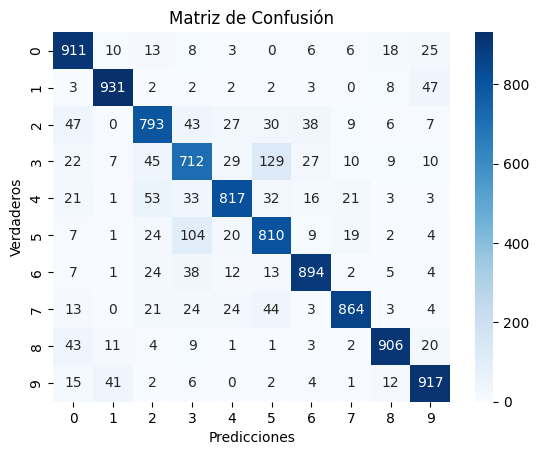

In [11]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel("Verdaderos")
plt.xlabel("Predicciones")
plt.show()

# Visualización de las Curvas de Aprendizaje

Para comprender mejor el proceso de aprendizaje y la convergencia del modelo durante el entrenamiento, es útil visualizar las curvas de precisión y pérdida. Estas gráficas proporcionan una visión clara de cómo evoluciona el rendimiento del modelo a lo largo de las épocas, tanto en el conjunto de entrenamiento como en el de validación.

## Curva de Precisión

- **Gráfica de Precisión de Entrenamiento vs. Validación**:
  - Usamos `plt.plot(history.history["accuracy"])` para trazar la precisión del modelo en el conjunto de entrenamiento a lo largo de las épocas.
  - De manera similar, `plt.plot(history.history["val_accuracy"])` traza la precisión en el conjunto de validación.
  - `plt.title("Curva de Precisión")`, `plt.xlabel("Épocas")`, y `plt.ylabel("Precisión")` añaden etiquetas descriptivas al gráfico.
  - `plt.legend()` incluye una leyenda que ayuda a identificar cada línea en la gráfica.

## Curva de Pérdida

- **Gráfica de Pérdida de Entrenamiento vs. Validación**:
  - La pérdida de entrenamiento se traza usando `plt.plot(history.history["loss"])`, mostrando cómo cambia la pérdida del modelo en el conjunto de entrenamiento con cada época.
  - La pérdida de validación se traza usando `plt.plot(history.history["val_loss"])`, proporcionando una perspectiva de cómo el modelo se desempeña en un conjunto no visto a medida que aprende.
  - Se configuran títulos y etiquetas para los ejes de manera similar a la gráfica de precisión, facilitando la interpretación de los resultados.

## Configuración del Entorno de la Gráfica

- **`plt.figure(figsize=(12, 6))`**: Establece el tamaño de la figura que contiene ambas gráficas, asegurando que haya suficiente espacio para visualizar claramente toda la información.
- **`plt.subplot(1, 2, 1)` y `plt.subplot(1, 2, 2)`**: Estos comandos dividen la figura en dos subgráficas, permitiendo mostrar la precisión y la pérdida lado a lado para una comparación directa.

Estas gráficas son herramientas esenciales para diagnosticar problemas en el entrenamiento, como el sobreajuste, donde la precisión de entrenamiento sigue mejorando mientras que la precisión de validación comienza a degradarse. Además, permiten verificar la eficacia de los callbacks, observando los efectos de reducciones en la tasa de aprendizaje y detenciones tempranas en el entrenamiento.


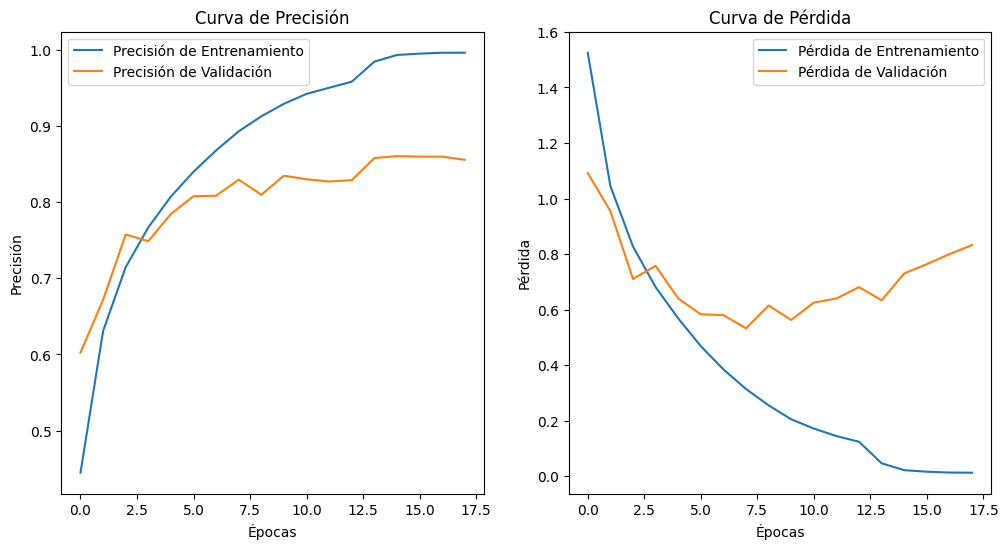

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Precisión de Entrenamiento")
plt.plot(history.history["val_accuracy"], label="Precisión de Validación")
plt.title("Curva de Precisión")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Pérdida de Entrenamiento")
plt.plot(history.history["val_loss"], label="Pérdida de Validación")
plt.title("Curva de Pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.show()

# Definición de Nombres de Clases para CIFAR-10

Para facilitar la interpretación de las predicciones del modelo y los análisis resultantes como las matrices de confusión, es útil tener una referencia clara de qué representa cada clase numérica. Para el conjunto de datos CIFAR-10, que incluye 10 clases diferentes, asignamos nombres descriptivos a cada índice numérico.

## Lista de Nombres de Clases

La siguiente lista asigna un nombre legible por humanos a cada categoría numérica correspondiente en el conjunto de datos CIFAR-10:

- **`class_names`**:
  - `"airplane"`: Aviones
  - `"automobile"`: Automóviles
  - `"bird"`: Aves
  - `"cat"`: Gatos
  - `"deer"`: Venados
  - `"dog"`: Perros
  - `"frog"`: Ranas
  - `"horse"`: Caballos
  - `"ship"`: Barcos
  - `"truck"`: Camiones

Cada elemento de la lista `class_names` está directamente relacionado con los índices de las clases del conjunto de datos, donde `"airplane"` corresponde al índice 0, `"automobile"` al índice 1, y así sucesivamente hasta `"truck"` que corresponde al índice 9.

## Utilidad de la Lista de Nombres de Clases

Esta lista es especialmente útil cuando se desea mostrar resultados de las predicciones del modelo, ya que permite convertir los índices de clase predichos a términos más comprensibles. También mejora la legibilidad de las visualizaciones, como gráficos de barras de probabilidades de clase o la matriz de confusión, haciendo que las etiquetas sean fácilmente identificables.

Definir y utilizar esta lista de nombres de clases ayuda a hacer que cualquier análisis o presentación de los resultados del modelo sea más accesible y comprensible para una audiencia más amplia, facilitando la interpretación y la discusión de los resultados del modelo.


In [15]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

# Curvas ROC y AUC por Clase

Las curvas de Característica Operativa del Receptor (ROC) y el Área Bajo la Curva (AUC) son herramientas poderosas para evaluar el rendimiento de los modelos de clasificación en todas las clases de manera visual y cuantitativa. En contextos de múltiples clases, como con el conjunto de datos CIFAR-10, es útil extender estas métricas para evaluar individualmente el rendimiento del modelo en cada clase.

## Preparación de los Datos

- **Binarización de las etiquetas**: Convertimos las etiquetas de prueba en formato binario para cada clase utilizando `label_binarize`, lo cual es necesario porque las curvas ROC originalmente están diseñadas para clasificación binaria.
- **Clases**: Generamos una lista de índices de clases `[0 a 9]` que se utilizan para binarizar las etiquetas.

## Cálculo de Curvas ROC y AUC

- **Inicialización de diccionarios**: `fpr` (Tasa de Falsos Positivos), `tpr` (Tasa de Verdaderos Positivos), y `roc_auc` (Área Bajo la Curva ROC) para almacenar los valores correspondientes a cada clase.
- **Cálculo por clase**: Iteramos sobre cada clase, calculamos la curva ROC y el AUC usando las funciones `roc_curve` y `auc` de sklearn. Esto se realiza comparando las etiquetas binarizadas con las probabilidades de predicción para cada clase.

## Visualización de las Curvas ROC

- **Configuración de la Figura**: Se establece un tamaño adecuado para la visualización de todas las curvas ROC.
- **Colores**: Se utiliza un ciclo de colores para diferenciar claramente las curvas de cada clase en el gráfico.
- **Trazado de Curvas**: Cada curva ROC se traza con su color correspondiente y se etiqueta con el nombre de la clase y el valor AUC, proporcionando una clara distinción entre el rendimiento del modelo en cada clase.
- **Línea de Diagonal**: Una línea de referencia diagonal (`k--`) se traza para representar un modelo de rendimiento aleatorio.

## Interpretación

- **Eje X (Tasa de Falsos Positivos)** y **Eje Y (Tasa de Verdaderos Positivos)**: Estas dimensiones son estándares para gráficos ROC, mostrando el compromiso entre sensibilidad y especificidad.
- **Área Bajo la Curva (AUC)**: Un AUC cercano a 1 indica un rendimiento muy bueno, mientras que un AUC cercano a 0.5 sugiere un rendimiento no mejor que el aleatorio.

Este análisis proporciona una evaluación detallada y visual del rendimiento del modelo en la clasificación de imágenes en las diversas categorías del conjunto de datos CIFAR-10, destacando qué clases son fácilmente diferenciables por el modelo y cuáles presentan desafíos.


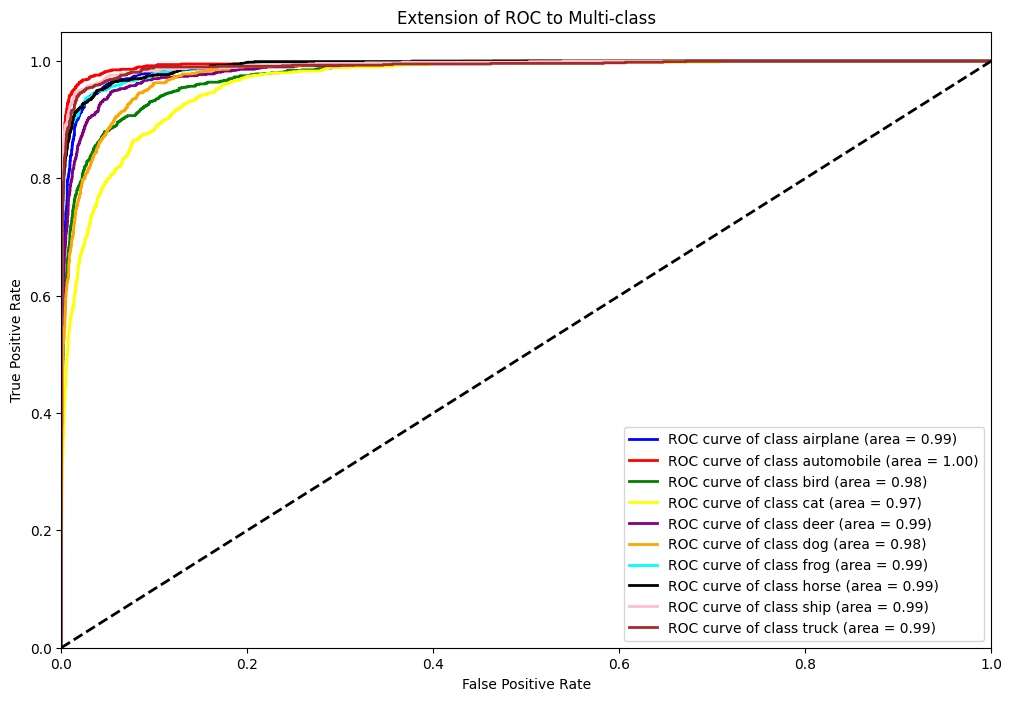

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_test_bin = label_binarize(y_test, classes=[i for i in range(10)])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'cyan', 'black', 'pink', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extension of ROC to Multi-class')
plt.legend(loc="lower right")
plt.show()


# Reporte de Clasificación para el Modelo

Una vez evaluadas las predicciones del modelo, es útil generar un reporte de clasificación que proporcione métricas detalladas por clase. Este reporte incluye la precisión, la recuperación (recall), el puntaje F1, y el soporte (número de muestras) para cada clase, ofreciendo una visión completa del rendimiento del modelo.

## Función `classification_report` de Scikit-Learn

- **Parámetros**:
  - **`true_classes`**: Las clases verdaderas del conjunto de prueba. Estas han sido convertidas de formato one-hot a sus índices de clase correspondientes para esta evaluación.
  - **`predicted_classes`**: Las clases predichas por el modelo, obtenidas al tomar el índice de la máxima probabilidad de las predicciones del modelo para cada muestra.
  - **`target_names=class_names`**: Los nombres de las clases proporcionados para hacer el reporte más legible, usando la lista `class_names` que incluye nombres como "airplane", "automobile", etc.

## Salida y Interpretación

El reporte generado proporciona las siguientes métricas para cada clase:
- **Precisión**: La proporción de predicciones correctas entre las muestras clasificadas como pertenecientes a esa clase.
- **Recuperación (Recall)**: La proporción de muestras verdaderas de esa clase que fueron correctamente identificadas.
- **Puntaje F1**: Una medida que combina la precisión y la recuperación en un solo valor, siendo útil para comparar modelos que tienen una precisión y recuperación similares.
- **Soporte**: El número de muestras reales de cada clase en el conjunto de prueba, lo cual es importante para ver el balance de clase.

Este reporte es crucial para entender las capacidades y limitaciones del modelo en la clasificación de diferentes tipos de imágenes, permitiendo a los desarrolladores y científicos de datos realizar mejoras dirigidas basadas en resultados concretos.

Este tipo de análisis detallado es esencial para cualquier proyecto de clasificación de imágenes, ya que proporciona una evaluación cuantitativa del modelo, permitiendo identificar áreas específicas para mejoras y ajustes.


In [17]:
from sklearn.metrics import classification_report

report = classification_report(
    true_classes, predicted_classes, target_names=class_names
)
print(report)

              precision    recall  f1-score   support

    airplane       0.84      0.91      0.87      1000
  automobile       0.93      0.93      0.93      1000
        bird       0.81      0.79      0.80      1000
         cat       0.73      0.71      0.72      1000
        deer       0.87      0.82      0.84      1000
         dog       0.76      0.81      0.79      1000
        frog       0.89      0.89      0.89      1000
       horse       0.93      0.86      0.89      1000
        ship       0.93      0.91      0.92      1000
       truck       0.88      0.92      0.90      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Generación y Combinación de Predicciones

Después de entrenar el modelo, es común querer generar predicciones no solo para el conjunto de prueba sino también para el conjunto de entrenamiento. Esto permite analizar cómo el modelo se comporta en ambos, lo que puede ser útil para diagnosticar problemas como el sobreajuste o el subajuste.

## Generación de Predicciones

- **`model.predict(x_train)`**: Realiza predicciones sobre el conjunto de entrenamiento completo. Esto es útil para comparar cómo el modelo se comporta en los datos sobre los que fue entrenado.
- **`model.predict(x_test)`**: Realiza predicciones sobre el conjunto de prueba. Estas predicciones se utilizan comúnmente para evaluar el rendimiento del modelo, como hemos hecho en pasos anteriores.

## Combinación de Predicciones

- **`np.concatenate((result_predict, result_predict_2), axis=0)`**: Este comando combina las predicciones de los conjuntos de entrenamiento y prueba en un solo array. Aquí, `axis=0` indica que la concatenación se realiza a lo largo del eje de las muestras, es decir, apilando las predicciones del conjunto de entrenamiento encima de las del conjunto de prueba.

### Uso del Resultado Combinado

La combinación de estas predicciones puede ser útil para análisis agregados, como:
- **Evaluación Global**: Permite realizar evaluaciones en todo el conjunto de datos para obtener una imagen completa del rendimiento del modelo.
- **Visualizaciones Combinadas**: Puede facilitar la creación de visualizaciones que comparen directamente las características de las predicciones entre los datos de entrenamiento y de prueba.

Este enfoque ayuda a garantizar que se tenga una visión completa del comportamiento del modelo, lo cual es crucial para tomar decisiones informadas sobre ajustes adicionales en el entrenamiento o en la configuración del modelo.


In [18]:
result_predict = model.predict(x_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step


In [19]:
result_predict_2 = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


In [20]:
result_total = np.concatenate((result_predict, result_predict_2), axis=0)

# Visualización de Imágenes Correctamente Clasificadas

Para evaluar y visualizar cómo el modelo de clasificación ha performado con imágenes específicas, se puede implementar una función que muestre las imágenes que han sido correctamente clasificadas junto con sus probabilidades de predicción. Esta herramienta visual es particularmente útil para comprender la certeza del modelo al hacer predicciones correctas.

## Descripción de la Función `plot_correctly_classified_images`

- **Parámetros**:
  - `x_data`: Los datos de imagen originales (por ejemplo, `x_test`).
  - `y_true`: Las etiquetas verdaderas de las imágenes en formato one-hot.
  - `y_pred_probs`: Las probabilidades de predicción para cada clase, proporcionadas por el modelo.
  - `class_names`: Una lista de nombres de clases para hacer las etiquetas más legibles.
  - `num_images`: Número máximo de imágenes a mostrar.
  - `scale`: Factor de escala para ajustar el tamaño de las figuras y fuentes.

### Proceso Implementado en la Función

1. **Identificación de Imágenes Correctamente Clasificadas**:
   - Se crea una máscara booleana que identifica cuáles imágenes fueron clasificadas correctamente comparando las etiquetas verdaderas y las predicciones.

2. **Preparación de los Datos**:
   - Se filtran las imágenes, etiquetas y probabilidades de predicción que corresponden solo a las clasificaciones correctas.

3. **Configuración de la Figura**:
   - Se inicializa una figura de Matplotlib con dimensiones basadas en el número de imágenes a mostrar y el factor de escala.

4. **Bucle para Visualización**:
   - Para cada imagen correctamente clasificada (hasta el máximo definido por `num_images`), se realizan dos subplots:
     - **Imagen Original**: Se muestra la imagen con su etiqueta verdadera.
     - **Mapa de Calor de Probabilidades**: Se visualiza un mapa de calor de las probabilidades de predicción para cada clase.
  
5. **Ajustes Finales y Visualización**:
   - Se ajustan los detalles de la visualización como rotación de etiquetas, tamaño de fuente y se evita mostrar los ejes para mejorar la estética.

## Utilidad de la Visualización

Esta visualización es valiosa para:
- **Evaluación de la Confianza del Modelo**: Observar cuán confiado estaba el modelo en sus predicciones correctas.
- **Verificación de la Calidad de la Clasificación**: Comprobar visualmente que las imágenes son representativas de sus etiquetas, lo que puede ayudar a detectar errores en los datos o en la etiquetación.
- **Presentaciones y Reportes**: Usar estas visualizaciones para comunicar el rendimiento del modelo a otras personas, especialmente en contextos no técnicos.

La función proporciona una forma interactiva y detallada de evaluar el desempeño del modelo, añadiendo un nivel de transparencia y comprensión sobre cómo y cuándo el modelo realiza correctamente sus tareas de clasificación.


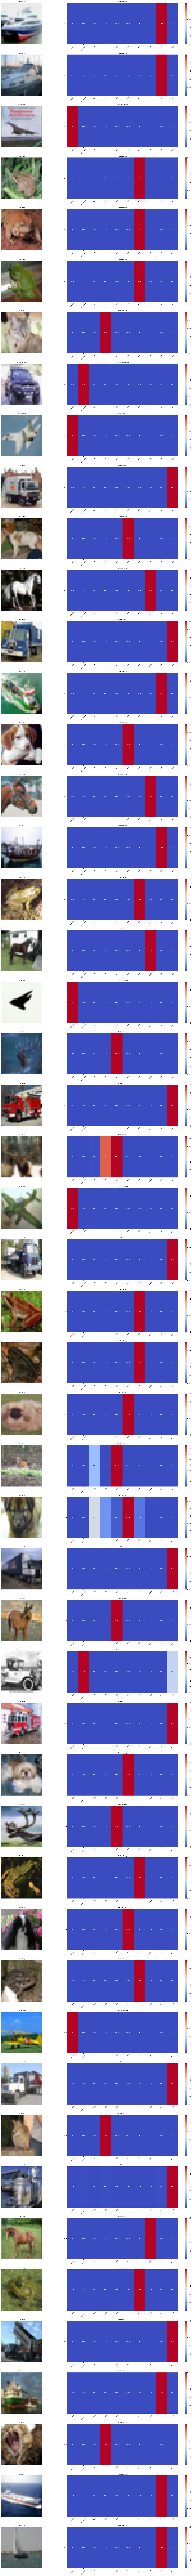

In [23]:
def plot_correctly_classified_images(
    x_data, y_true, y_pred_probs, class_names, num_images=50, scale=2
):
    correctly_classified_mask = np.argmax(y_true, axis=1) == np.argmax(
        y_pred_probs, axis=1
    )
    x_correct = x_data[correctly_classified_mask]
    y_correct_true = y_true[correctly_classified_mask]
    y_correct_pred_probs = y_pred_probs[correctly_classified_mask]

    num_plot = min(num_images, x_correct.shape[0])
    plt.figure(figsize=(15 * scale, 3 * num_plot * scale))

    for i in range(num_plot):
        plt.subplot(num_plot, 2, 2 * i + 1)
        plt.imshow(x_correct[i], interpolation="nearest")
        plt.title(
            f"True: {class_names[np.argmax(y_correct_true[i])]}", fontsize=scale * 5
        )
        plt.axis("off")

        plt.subplot(num_plot, 2, 2 * i + 2)
        heatmap = np.array([y_correct_pred_probs[i]])
        sns.heatmap(
            heatmap,
            annot=True,
            fmt=".3f",
            cmap="coolwarm",
            cbar=True,
            xticklabels=class_names,
            annot_kws={"size": scale * 5},
        )
        plt.xticks(rotation=45, fontsize=scale * 5)
        plt.yticks(fontsize=scale * 5)
        plt.title(
            f"Predicted: {class_names[np.argmax(y_correct_pred_probs[i])]}",
            fontsize=scale * 5,
        )

    plt.tight_layout()
    plt.show()


plot_correctly_classified_images(x_test, y_test, result_predict_2, class_names, scale=1.5)

# Visualización de Imágenes Incorrectamente Clasificadas con Mapa de Calor de Probabilidades

Para una evaluación más profunda del desempeño del modelo, es útil visualizar las imágenes que fueron incorrectamente clasificadas, junto con un mapa de calor que muestre las probabilidades de predicción para cada clase. Esta visualización puede proporcionar insights sobre cómo y por qué el modelo está cometiendo errores.

## Función `plot_misclassified_images_with_heatmap`

- **Parámetros**:
  - `x_data`: Datos de las imágenes, asegurando que estén escalados adecuadamente para su visualización.
  - `y_true`: Etiquetas verdaderas en formato one-hot.
  - `y_pred_probs`: Probabilidades de predicción para cada clase proporcionadas por el modelo.
  - `class_names`: Nombres de las clases para facilitar la interpretación de las etiquetas.
  - `num_images`: Número máximo de imágenes a mostrar.
  - `scale`: Factor de escala para ajustar el tamaño de la figura y los textos.

### Proceso de la Función

1. **Escalado de Imágenes**:
   - Se asegura que las imágenes estén en el rango [0, 1], utilizando `np.clip` para ajustar los valores de los píxeles y garantizar una visualización adecuada.

2. **Identificación de Imágenes Mal Clasificadas**:
   - Se crea una máscara booleana para detectar las imágenes que el modelo ha clasificado incorrectamente.

3. **Filtrado de Datos**:
   - Se seleccionan solo las imágenes, etiquetas verdaderas y probabilidades de predicción que corresponden a las clasificaciones erróneas.

4. **Visualización**:
   - Se itera sobre las imágenes seleccionadas para visualizar tanto la imagen como un mapa de calor de las probabilidades de predicción:
     - **Imagen**: Se muestra la imagen con su etiqueta verdadera indicada.
     - **Mapa de Calor**: Se visualiza el vector de probabilidades como un mapa de calor, proporcionando una representación visual de cómo el modelo evaluó cada clase posible para esa imagen.

5. **Ajustes de Visualización**:
   - Se configuran los detalles como el tamaño de fuente, la rotación de las etiquetas y la disposición de los elementos gráficos para maximizar la claridad y el impacto visual.

## Utilidad de la Visualización

Esta visualización es extremadamente útil para:
- **Diagnóstico de Errores**: Comprender en qué clases y bajo qué condiciones el modelo tiende a equivocarse.
- **Mejoras del Modelo**: Identificar patrones en los errores que podrían guiar ajustes en la arquitectura del modelo, el preprocesamiento de datos o la técnica de entrenamiento.
- **Comunicación**: Facilitar la discusión sobre el rendimiento del modelo con partes interesadas técnicas y no técnicas, mostrando de manera concreta los desafíos que enfrenta el modelo.

La función se convierte en una herramienta clave para los desarrolladores y científicos de datos que buscan optimizar modelos de clasificación, proporcionando una manera clara y directa de evaluar y presentar las áreas problemáticas en la clasificación realizada por el modelo.


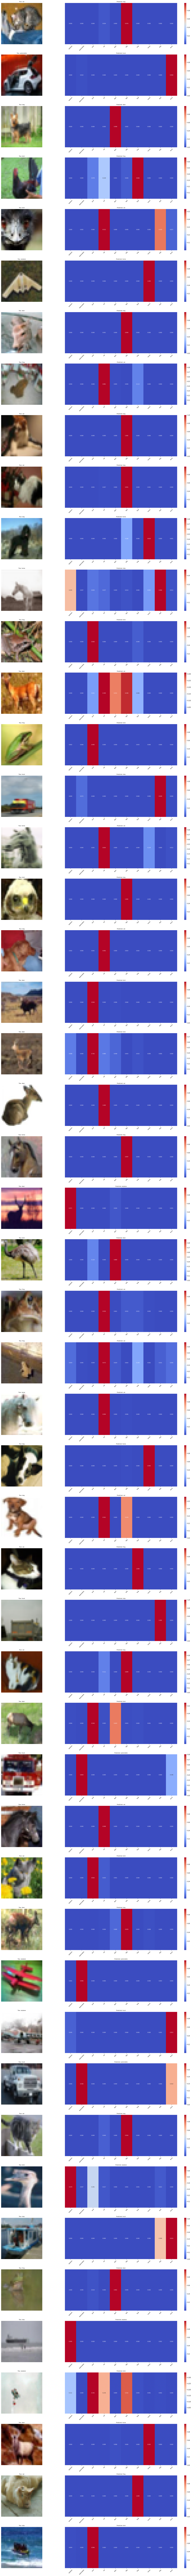

In [24]:
def plot_misclassified_images_with_heatmap(
    x_data, y_true, y_pred_probs, class_names, num_images=50, scale=2
):
    x_data = np.clip(x_data, 0, 1)

    # Identify misclassified examples
    misclassified_mask = np.argmax(y_true, axis=1) != np.argmax(y_pred_probs, axis=1)
    x_misclassified = x_data[misclassified_mask]
    y_misclassified_true = y_true[misclassified_mask]
    y_misclassified_pred_probs = y_pred_probs[misclassified_mask]

    num_plot = min(num_images, x_misclassified.shape[0])
    plt.figure(figsize=(15 * scale, 3 * num_plot * scale))

    for i in range(num_plot):
        plt.subplot(num_plot, 2, 2 * i + 1)
        plt.imshow(
            x_misclassified[i], interpolation="nearest"
        )
        plt.title(
            f"True: {class_names[np.argmax(y_misclassified_true[i])]}",
            fontsize=scale * 5,
        )
        plt.axis("off")

        plt.subplot(num_plot, 2, 2 * i + 2)
        heatmap = np.array([y_misclassified_pred_probs[i]])
        sns.heatmap(
            heatmap,
            annot=True,
            fmt=".3f",
            cmap="coolwarm",
            cbar=True,
            xticklabels=class_names,
            annot_kws={"size": scale * 5},
        )
        plt.xticks(rotation=45, fontsize=scale * 5)
        plt.yticks([])
        plt.title(
            f"Predicted: {class_names[np.argmax(y_misclassified_pred_probs[i])]}",
            fontsize=scale * 5,
        )

    plt.tight_layout()
    plt.show()

plot_misclassified_images_with_heatmap(
    x_test, y_test, predictions, class_names, scale=1.5
)